In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")


# Data Cleaning and Visualization

In [3]:
df.describe() 

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.dataframeName = 'Life Expectancy Data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2938 rows and 22 columns


In [7]:
#Returns the column name of DataFrame
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
# handling null/ missing values
numerical_features = [ column_name for column_name in df.columns if df[column_name].dtype !='0']
null_numerical_features = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in null_numerical_features:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

In [9]:
# Verifying null-values after applying above methods
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
df.rename(columns={ 'Life expectancy ':'Life_expectancy', 'Adult Mortality':'Adult_Mortality',
       'infant deaths':'infant_deaths', 'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'Hepatitis_B',
       'Measles ':'Measles', ' BMI ':'BMI', 'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_expenditure',
       'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinnes_1_19_years', ' thinness 5-9 years':'thinness_5_9_years','Income composition of resources':'Income_composition_of_resources'},inplace=True)

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

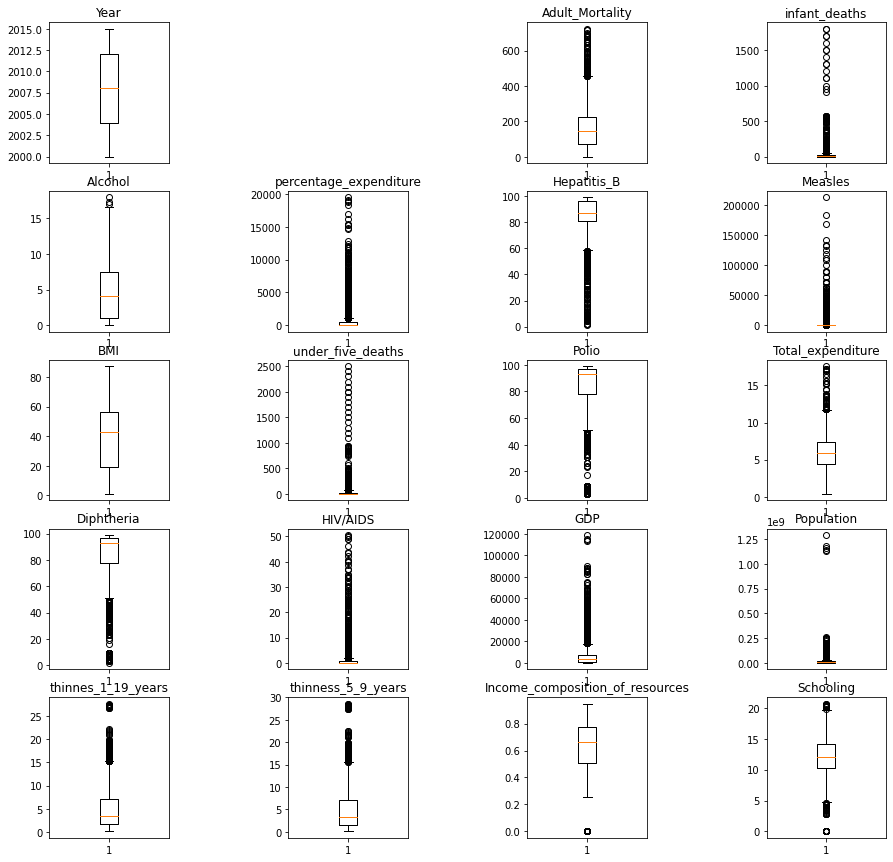

In [13]:
#checking outliers in the dataset 
col_dict = { 'Year':1 , 'Adult_Mortality':3 ,
       'infant_deaths':4 , 'Alcohol':5 , 'percentage_expenditure':6 , 'Hepatitis_B':7 ,
       'Measles':8 , 'BMI':9 , 'under_five_deaths':10 , 'Polio':11 , 'Total_expenditure':12 ,
       'Diphtheria':13 , 'HIV/AIDS':14 , 'GDP':15 , 'Population':16 ,
       'thinnes_1_19_years':17 , 'thinness_5_9_years':18 ,
       'Income_composition_of_resources':19, 'Schooling':20 }

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=1, hspace=None)

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [14]:
#printing out the number of outliers and its percentage

def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.75)
    max_val = q75 + (iqr*1.75)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
for col in col_dict:
    outlier_count(col)

---------------Year---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Adult_Mortality---------------
Number of outliers: 59
Percent of data that is outlier: 2.01%
---------------infant_deaths---------------
Number of outliers: 268
Percent of data that is outlier: 9.12%
---------------Alcohol---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------percentage_expenditure---------------
Number of outliers: 361
Percent of data that is outlier: 12.29%
---------------Hepatitis_B---------------
Number of outliers: 293
Percent of data that is outlier: 9.97%
---------------Measles---------------
Number of outliers: 528
Percent of data that is outlier: 17.97%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under_five_deaths---------------
Number of outliers: 367
Percent of data that is outlier: 12.49%
---------------Polio---------------
Number of outliers: 232
Pe

In [15]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [16]:
# treating the outliers 

features_with_outliers = ['Adult_Mortality','infant_deaths','Alcohol', 'percentage_expenditure','Hepatitis_B','Measles', 'BMI', 'under_five_deaths','Polio','Total_expenditure','Diphtheria','HIV/AIDS', 'GDP', 'Population','thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)#the median of the lower half 
    q3 = df[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.75)
    upper_limit = q3 + (IQR*1.75)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

In [17]:
#printing out the dropped outliers 
for col in col_dict:
    outlier_count(col)

---------------Year---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Adult_Mortality---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------infant_deaths---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Alcohol---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------percentage_expenditure---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Hepatitis_B---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Measles---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under_five_deaths---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Polio---------------
Number of outliers: 0
Percent of data that is 

In [18]:
df.corr().head()

Year  Life_expectancy  Adult_Mortality  infant_deaths  \
Year             1.000000         0.169623        -0.070024      -0.048783   
Life_expectancy  0.169623         1.000000        -0.694173      -0.557979   
Adult_Mortality -0.070024        -0.694173         1.000000       0.373721   
infant_deaths   -0.048783        -0.557979         0.373721       1.000000   
Alcohol         -0.048168         0.391598        -0.196278      -0.316783   

                  Alcohol  percentage_expenditure  Hepatitis_B   Measles  \
Year            -0.048168                0.031248     0.133872 -0.123536   
Life_expectancy  0.391598                0.487330     0.286148 -0.334662   
Adult_Mortality -0.196278               -0.319520    -0.197023  0.206853   
infant_deaths   -0.316783               -0.337840    -0.294257  0.583589   
Alcohol          1.000000                0.388832     0.100896 -0.192506   

                      BMI  under_five_deaths     Polio  Total_expenditure  \
Year             0.108327          -0.052847  0.113928           0.080944   
Life_expectancy  0.559255          -0.598274  0.556598           0.209671   
Adult_Mortality -0.390516           0.400547 -0.342848          -0.119652   
infant_deaths   -0.447036           0.992917 -0.409714          -0.156864   
Alcohol          0.318070          -0.323956  0.253491           0.300853   

                 Diphtheria  HIV/AIDS       GDP  Population  \
Year               0.146725 -0.091245  0.098758    0.043936   
Life_expectancy    0.563606 -0.794463  0.497623    0.011519   
Adult_Mortality   -0.341498  0.603164 -0.318975    0.000258   
infant_deaths     -0.400238  0.407592 -0.311268    0.329764   
Alcohol            0.257351 -0.184532  0.389947   -0.027269   

                 thinnes_1_19_years  thinness_5_9_years  \
Year                      -0.048111           -0.049266   
Life_expectancy           -0.502579           -0.499189   
Adult_Mortality            0.334696            0.342391   
infant_deaths              0.428269            0.443540   
Alcohol                   -0.433680           -0.423388   

                 Income_composition_of_resources  Schooling  
Year                                    0.234188   0.200832  
Life_expectancy                         0.705062   0.733562  
Adult_Mortality                        -0.457523  -0.457442  
infant_deaths                          -0.387142  -0.493999  
Alcohol                                 0.423742   0.513252

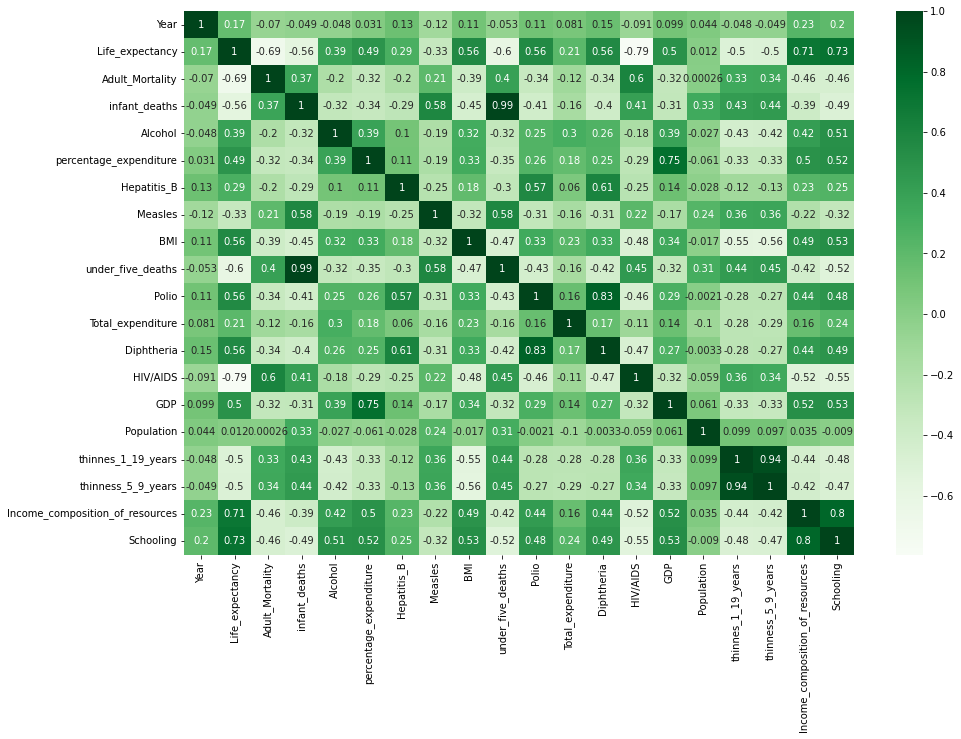

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

Index(['Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


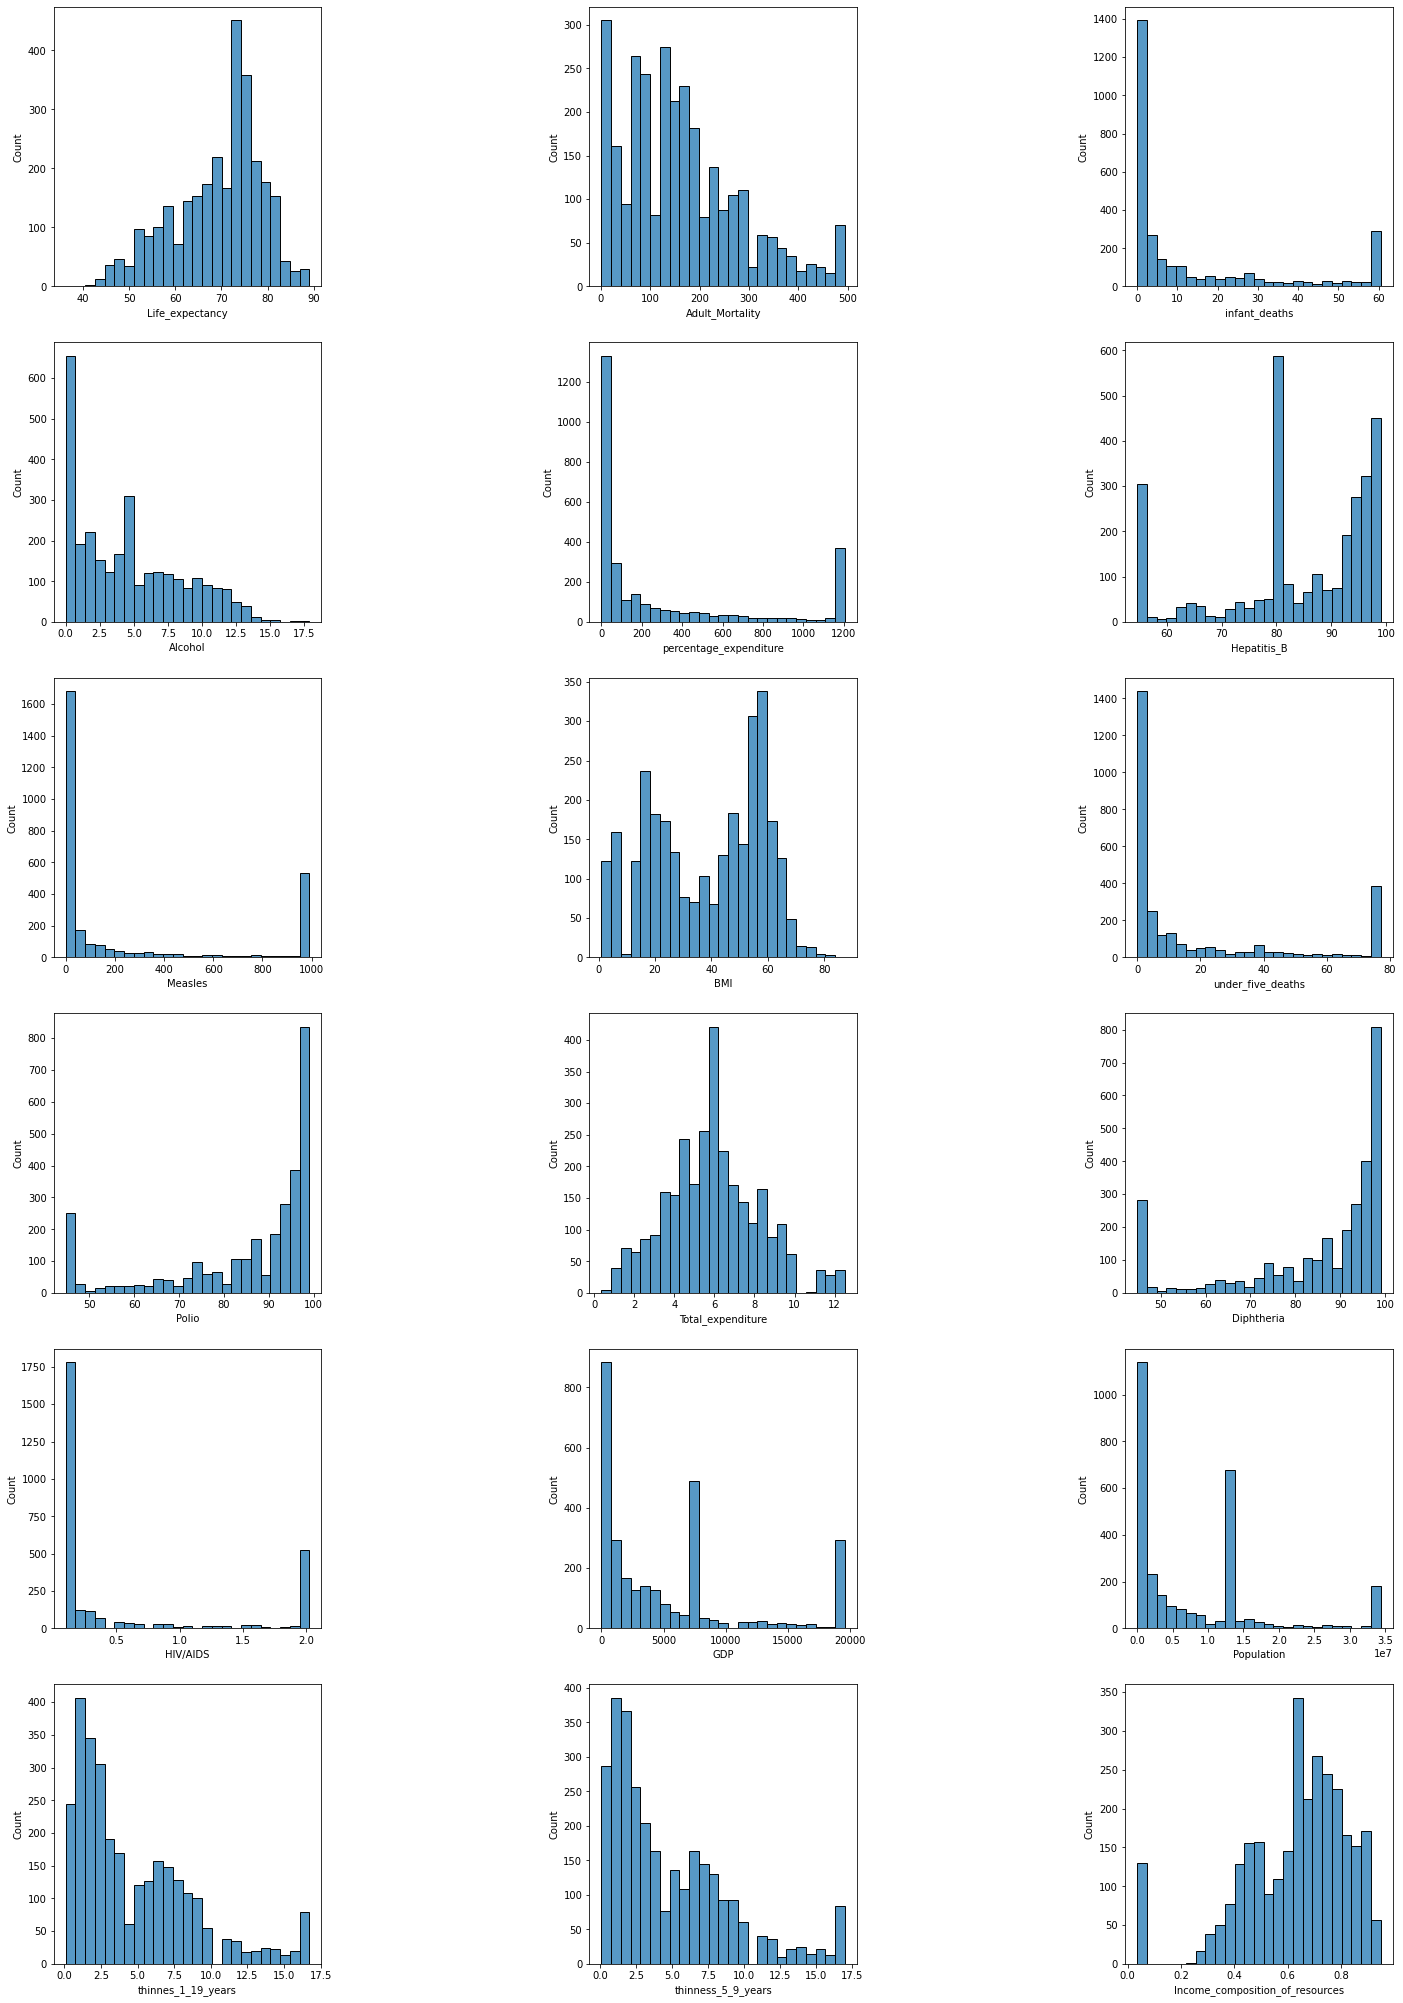

In [21]:
data_numeric = df.select_dtypes(include='number')

column_numeric = data_numeric.columns.drop('Year')

print(column_numeric)
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in column_numeric:
    plt.subplot(6,3,i)
    sns.histplot(data = df[col_name],  bins = 25)
    i +=1
    if i==19:
        break

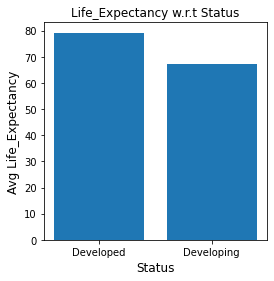

In [22]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(4,4))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life_expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

In [23]:
fig=px.histogram(df,x='Life_expectancy',template='plotly_dark')
fig.show()

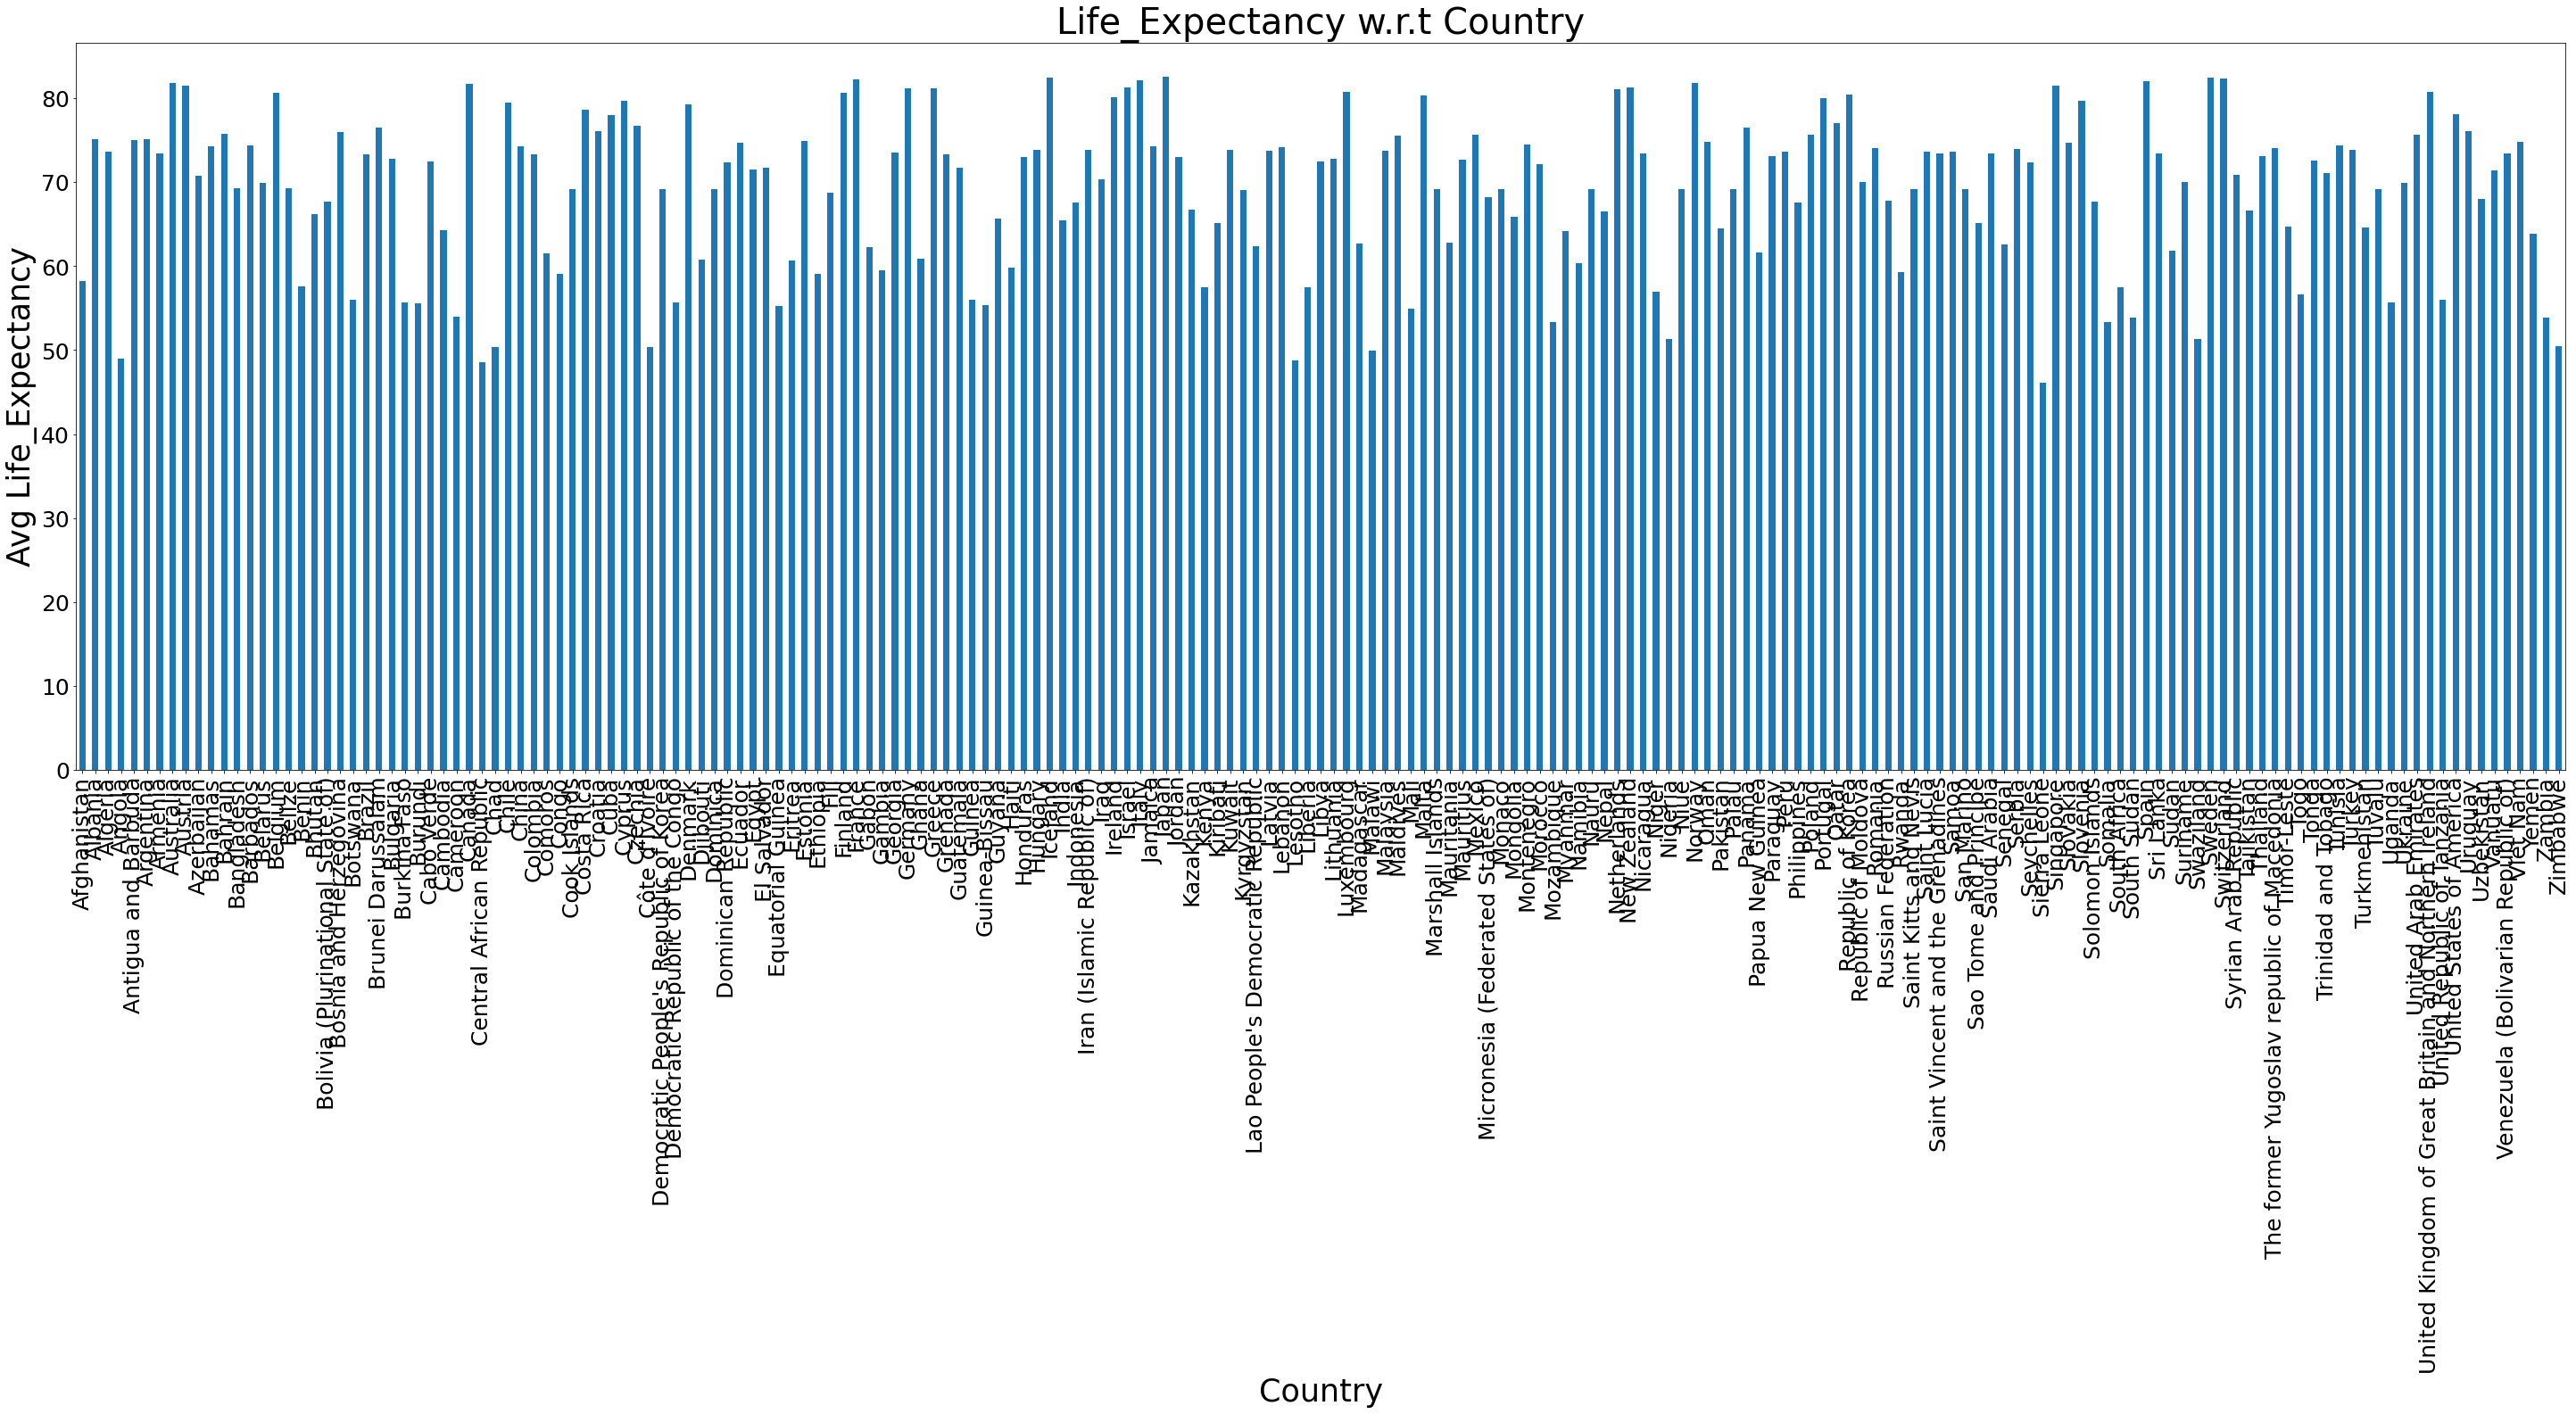

In [24]:
# Life_Expectancy w.r.t Country using bar plot.
le_country = df.groupby('Country')['Life_expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



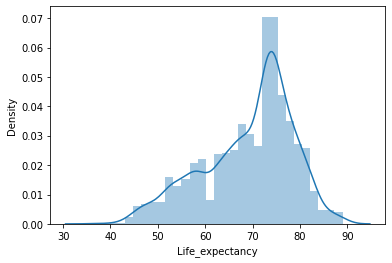

In [25]:
sns.distplot(df['Life_expectancy']); #show a histogram with a line on it for Life_expectancy

In [26]:
#Suuny se map wala lena h phir krna h

# Distribution Analysis

In [27]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statistics

In [28]:
dataset = df['Life_expectancy']

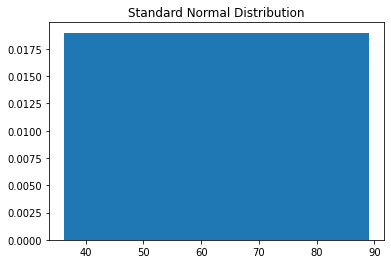

In [29]:
plt.hist(df['Life_expectancy'], bins=1, density=1)
plt.title('Standard Normal Distribution')
plt.show()

In [30]:
df.describe()

Year  Life_expectancy  Adult_Mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.224932       162.942211      14.188904   
std       4.613841         9.507640       117.938193      20.338045   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       494.750000      60.500000   

           Alcohol  percentage_expenditure  Hepatitis_B      Measles  \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.602861              297.896390    84.247737   250.100068   
std       3.916288              418.926742    13.629595   384.786387   
min       0.010000                0.000000    54.586268     0.000000   
25%       1.092500                4.685343    80.940461     0.000000   
50%       4.160000               64.912906    87.000000    17.000000   
75%       7.390000              441.534144    96.000000   360.250000   
max      17.870000             1206.019547    99.000000   990.687500   

               BMI  under_five_deaths        Polio  Total_expenditure  \
count  2938.000000        2938.000000  2938.000000        2938.000000   
mean     38.321247          18.879850    84.872857           5.913765   
std      19.927677          27.118126    16.767553           2.314283   
min       1.000000           0.000000    44.750000           0.370000   
25%      19.400000           0.000000    78.000000           4.370000   
50%      43.000000           4.000000    93.000000           5.938190   
75%      56.100000          28.000000    97.000000           7.330000   
max      87.300000          77.000000    99.000000          12.510000   

        Diphtheria     HIV/AIDS           GDP    Population  \
count  2938.000000  2938.000000   2938.000000  2.938000e+03   
mean     84.774815     0.567546   5316.569009  7.873673e+06   
std      16.843157     0.753383   5998.194268  9.421068e+06   
min      44.750000     0.100000      1.681350  3.400000e+01   
25%      78.000000     0.100000    580.486996  4.189172e+05   
50%      93.000000     0.100000   3116.561755  3.675929e+06   
75%      97.000000     0.800000   7483.158469  1.275338e+07   
max      99.000000     2.025000  19562.833548  3.433868e+07   

       thinnes_1_19_years  thinness_5_9_years  \
count         2938.000000         2938.000000   
mean             4.743108            4.765143   
std              4.037364            4.090623   
min              0.100000            0.100000   
25%              1.600000            1.600000   
50%              3.400000            3.400000   
75%              7.100000            7.200000   
max             16.725000           17.000000   

       Income_composition_of_resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.629130    12.029672  
std                           0.200056     3.148160  
min                           0.035687     3.650000  
25%                           0.504250    10.300000  
50%                           0.662000    12.100000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000

Text(0.5, 1.0, 'KS Goodness of Fit')

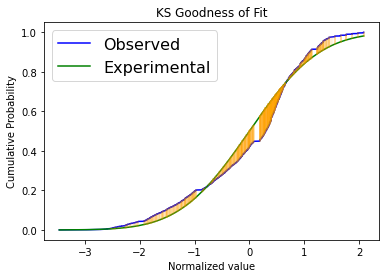

In [31]:
dataset = df['Life_expectancy']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')



In [32]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

Text(0.5, 1.0, 'KS Goodness of Fit')

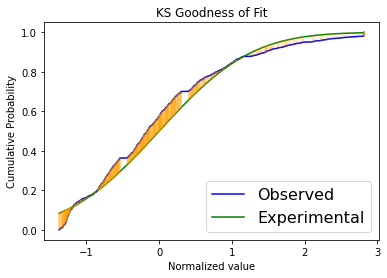

In [33]:
dataset = df['Adult_Mortality']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

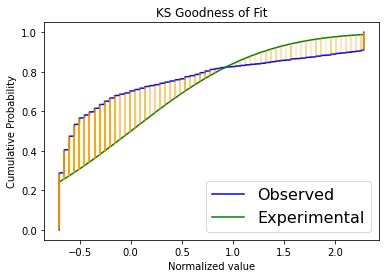

In [34]:
dataset = df['infant_deaths']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

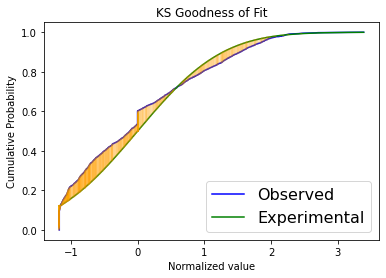

In [35]:
dataset = df['Alcohol']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

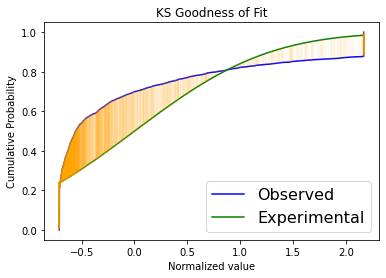

In [36]:
dataset = df['percentage_expenditure']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

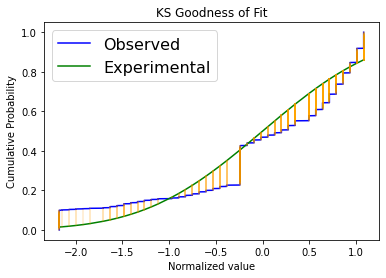

In [37]:
dataset = df['Hepatitis_B']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

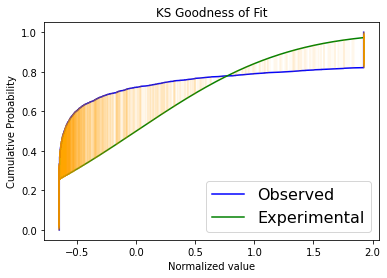

In [38]:
dataset = df['Measles']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

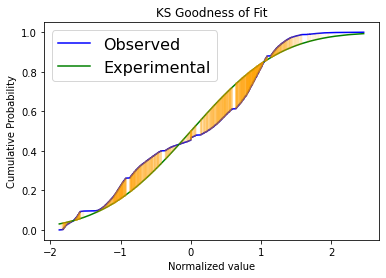

In [39]:
dataset = df['BMI']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

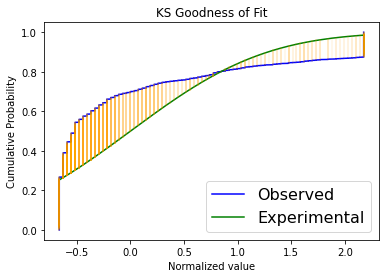

In [40]:
dataset = df['under_five_deaths']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

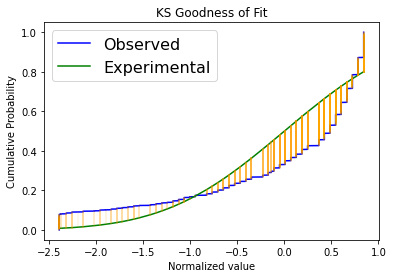

In [41]:
dataset = df['Polio']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

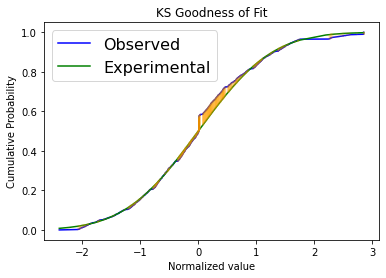

In [42]:
dataset = df['Total_expenditure']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [43]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

Text(0.5, 1.0, 'KS Goodness of Fit')

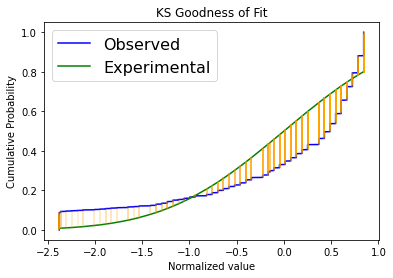

In [44]:
dataset = df['Diphtheria']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

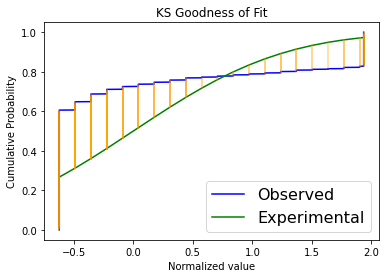

In [45]:
dataset = df['HIV/AIDS']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

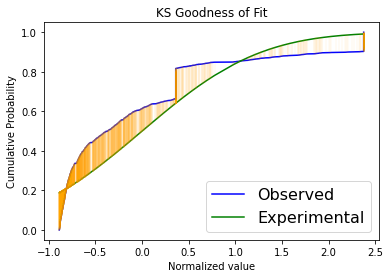

In [46]:
dataset = df['GDP']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


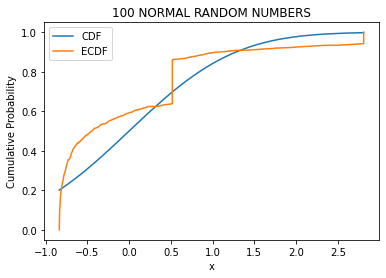

In [47]:
dataset = df['Population']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(len(dataset))/len(dataset)
#Plotting the CDF and ECDF values on a curve
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('100 NORMAL RANDOM NUMBERS')

plt.plot(data_sorted, CDF)
plt.plot(data_sorted, ECDF)

plt.legend(['CDF', 'ECDF'])

Text(0.5, 1.0, 'KS Goodness of Fit')

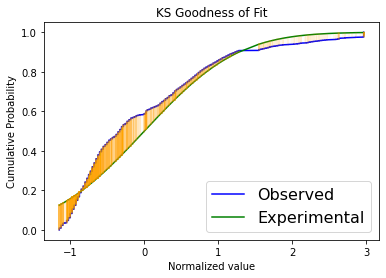

In [48]:
dataset = df['thinnes_1_19_years']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [49]:
df.columns


Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

Text(0.5, 1.0, 'KS Goodness of Fit')

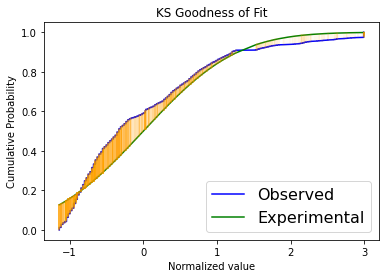

In [50]:
dataset = df['thinness_5_9_years']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

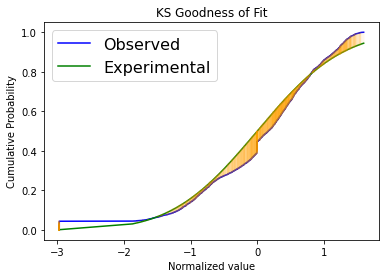

In [51]:
dataset = df['Income_composition_of_resources']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Text(0.5, 1.0, 'KS Goodness of Fit')

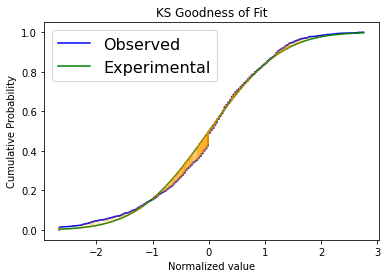

In [52]:
dataset = df['Schooling']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Thus factors which are close to normal with significance 0.05 are LIFE EXPECTANCY, ADULT MORTALITY, ALCOHOL, TOTAL EXPENDITURE, INCOME COMPISITION OF RESOURCES, SCHOOLING

# Data Scaling

In [53]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['class'] = labelencoder.fit_transform(df['Status'])
df.drop('Status', axis=1, inplace=True)

In [54]:
df.describe()

Year  Life_expectancy  Adult_Mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.224932       162.942211      14.188904   
std       4.613841         9.507640       117.938193      20.338045   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       494.750000      60.500000   

           Alcohol  percentage_expenditure  Hepatitis_B      Measles  \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.602861              297.896390    84.247737   250.100068   
std       3.916288              418.926742    13.629595   384.786387   
min       0.010000                0.000000    54.586268     0.000000   
25%       1.092500                4.685343    80.940461     0.000000   
50%       4.160000               64.912906    87.000000    17.000000   
75%       7.390000              441.534144    96.000000   360.250000   
max      17.870000             1206.019547    99.000000   990.687500   

               BMI  under_five_deaths  ...  Total_expenditure   Diphtheria  \
count  2938.000000        2938.000000  ...        2938.000000  2938.000000   
mean     38.321247          18.879850  ...           5.913765    84.774815   
std      19.927677          27.118126  ...           2.314283    16.843157   
min       1.000000           0.000000  ...           0.370000    44.750000   
25%      19.400000           0.000000  ...           4.370000    78.000000   
50%      43.000000           4.000000  ...           5.938190    93.000000   
75%      56.100000          28.000000  ...           7.330000    97.000000   
max      87.300000          77.000000  ...          12.510000    99.000000   

          HIV/AIDS           GDP    Population  thinnes_1_19_years  \
count  2938.000000   2938.000000  2.938000e+03         2938.000000   
mean      0.567546   5316.569009  7.873673e+06            4.743108   
std       0.753383   5998.194268  9.421068e+06            4.037364   
min       0.100000      1.681350  3.400000e+01            0.100000   
25%       0.100000    580.486996  4.189172e+05            1.600000   
50%       0.100000   3116.561755  3.675929e+06            3.400000   
75%       0.800000   7483.158469  1.275338e+07            7.100000   
max       2.025000  19562.833548  3.433868e+07           16.725000   

       thinness_5_9_years  Income_composition_of_resources    Schooling  \
count         2938.000000                      2938.000000  2938.000000   
mean             4.765143                         0.629130    12.029672   
std              4.090623                         0.200056     3.148160   
min              0.100000                         0.035687     3.650000   
25%              1.600000                         0.504250    10.300000   
50%              3.400000                         0.662000    12.100000   
75%              7.200000                         0.772000    14.100000   
max             17.000000                         0.948000    20.700000   

             class  
count  2938.000000  
mean      0.825732  
std       0.379405  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 21 columns]

In [55]:
df_bk = df.copy()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   Adult_Mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   float64
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2938 non-null   float64
 8   Measles                          2938 non-null   float64
 9   BMI                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total_expenditure   

In [57]:
x = df.drop(['Country','Life_expectancy'],axis=1)
y = df['Life_expectancy']

In [58]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2056, 20), (882, 20), (2056,), (882,))

In [59]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [60]:
x_train.describe()

0            1            2            3            4   \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean      0.503696     0.325870     0.229371     0.265302     0.245609   
std       0.307863     0.236769     0.330965     0.227092     0.343495   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.266667     0.147848     0.000000     0.059393     0.004853   
50%       0.533333     0.289620     0.049587     0.240462     0.056580   
75%       0.800000     0.455696     0.347107     0.426734     0.358281   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean      0.671229     0.255360     0.433800     0.239211     0.744029   
std       0.305925     0.389705     0.232445     0.345883     0.307130   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.593379     0.000000     0.211583     0.000000     0.631336   
50%       0.752329     0.017160     0.492433     0.051948     0.889401   
75%       0.932453     0.387357     0.637951     0.337662     0.963134   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                10           11           12           13           14  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean      0.443768     0.742738     0.239116     0.267228     0.227648   
std       0.196350     0.308354     0.388523     0.302022     0.274076   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.314292     0.631336     0.000000     0.028709     0.011180   
50%       0.445194     0.889401     0.000000     0.151598     0.106170   
75%       0.566821     0.963134     0.311688     0.382466     0.371399   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                15           16           17           18           19  
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000  
mean      0.278377     0.276411     0.654172     0.500192     0.821498  
std       0.244333     0.243925     0.215904     0.185397     0.383028  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.090226     0.088757     0.517435     0.394659     1.000000  
50%       0.192481     0.189349     0.693636     0.507418     1.000000  
75%       0.421053     0.414201     0.808180     0.626113     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [61]:
x_test.describe()

0           1           2           3           4           5   \
count  882.000000  882.000000  882.000000  882.000000  882.000000  882.000000   
mean     0.495540    0.332912    0.246547    0.257569    0.250269    0.659955   
std      0.307050    0.243736    0.347884    0.217773    0.356393    0.309118   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.200000    0.147848    0.000000    0.063830    0.002274    0.593379   
50%      0.466667    0.290633    0.049587    0.228723    0.049273    0.684782   
75%      0.733333    0.466329    0.396694    0.412654    0.383818    0.932453   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  882.000000  882.000000  882.000000  882.000000  882.000000  882.000000   
mean     0.245669    0.453148    0.259137    0.729248    0.456782    0.726237   
std      0.385487    0.245954    0.366271    0.313509    0.187942    0.315231   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.224876    0.000000    0.576037    0.328048    0.594470   
50%      0.016655    0.499380    0.051948    0.889401    0.458665    0.870968   
75%      0.316952    0.678350    0.425325    0.963134    0.566722    0.963134   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               12          13          14          15          16          17  \
count  882.000000  882.000000  882.000000  882.000000  882.000000  882.000000   
mean     0.251657    0.282072    0.233131    0.281401    0.275188    0.646129   
std      0.398004    0.317099    0.275131    0.239479    0.237753    0.228363   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.030256    0.013612    0.090226    0.082840    0.509275   
50%      0.000000    0.167615    0.108644    0.204511    0.195266    0.671195   
75%      0.363636    0.382403    0.371399    0.433083    0.426036    0.809944   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               18          19  
count  882.000000  882.000000  
mean     0.484836    0.835601  
std      0.187851    0.370848  
min      0.000000    0.000000  
25%      0.378299    1.000000  
50%      0.489313    1.000000  
75%      0.607038    1.000000  
max      1.000000    1.000000

# Building a Pipeline

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

In [63]:
train_features = df.drop('Life_expectancy', axis=1)
train_features = df.drop('Country', axis=1)

In [64]:
train_labels = df["Life_expectancy"].copy()       

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# This is the main pipeline object, in which we are performing four tasks
# pipeline takes list of tuples of two values as (name of transform, transform object)
pre_pipe = Pipeline([
    # StandardScaler is very common scaling function. It makes every feature of dataset
    # having mean = 0 and std = 1
    ('Standard_scaling', StandardScaler())
])

# we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# Later it also transforms the input data as per the "transform()" definition of each object
train_prepared = pre_pipe.fit_transform(train_features)
train_prepared

array([[ 1.6217623 , -0.44444792,  0.84853616, ..., -0.75056837,
        -0.61305647,  0.45939851],
       [ 1.40498625, -0.98094995,  0.91637985, ..., -0.76556673,
        -0.64482646,  0.45939851],
       [ 1.1882102 , -0.98094995,  0.89093847, ..., -0.79556343,
        -0.67659645,  0.45939851],
       ...,
       [-1.19632639, -2.56941673, -0.76275139, ..., -1.01053983,
        -0.64482646,  0.45939851],
       [-1.41310244, -2.5168185 ,  2.81388295, ..., -1.01053983,
        -0.70836644,  0.45939851],
       [-1.62987849, -2.44318096,  2.81388295, ..., -0.97554367,
        -0.70836644,  0.45939851]])

In [66]:
train_prepared.shape

(2938, 21)

In [67]:
# The first model is Linear Regression model.

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
# Here, by calling .fit(), we are calculating parameters of the model only
linear_model.fit(train_prepared, train_labels)

LinearRegression()

In [68]:
# Lets check MSE & MAE errors on linear model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_pred = linear_model.predict(train_prepared)

linear_rmse = mean_squared_error(train_labels, train_pred, squared=False)
linear_mae = mean_absolute_error(train_labels, train_pred)

print("Root Mean Squared Error of Linear Model :", linear_rmse)
print("Mean Absolute Error of Linear Model :", linear_mae)

Root Mean Squared Error of Linear Model : 2.3491541161576866e-14
Mean Absolute Error of Linear Model : 1.925575650824342e-14


# Use of Validation set and Cross Validation approach

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
# Cross validation for linear model

scores = cross_val_score(linear_model,
                         train_prepared,
                         train_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)

linear_rmse_scores = np.sqrt(-scores)

print("Scores:", linear_rmse_scores)
print("Mean:", linear_rmse_scores.mean())
print("Standard deviation:", linear_rmse_scores.std())

Scores: [9.06004776e-15 9.99719195e-15 2.04403154e-14 4.55497454e-14
 1.64667391e-14 2.09096006e-14 1.20958484e-14 2.24693342e-14
 1.98339562e-14 1.52009518e-14]
Mean: 1.9202373089920943e-14
Standard deviation: 9.855470414016162e-15


 THUS THE SCORES ARE AS FOLLOWS:
Scores [9.06004776e-15 9.99719195e-15 2.04403154e-14 4.55497454e-14
 1.64667391e-14 2.09096006e-14 1.20958484e-14 2.24693342e-14
 1.98339562e-14 1.52009518e-14]
Mean: 1.9202373089920943e-14
Standard deviation: 9.855470414016162e-15

In [71]:
# let's try the full preprocessing pipeline on a few training instances

some_data = train_features.iloc[:10]
some_labels = train_labels.iloc[:10]
some_data_prepared = pre_pipe.transform(some_data)

print("Predictions:\t", list(linear_model.predict(some_data_prepared)))
print("Actual Labels:\t", list(some_labels))

Predictions:	 [65.00000000000001, 59.90000000000001, 59.90000000000001, 59.500000000000014, 59.20000000000002, 58.80000000000002, 58.60000000000002, 58.10000000000002, 57.50000000000002, 57.30000000000002]
Actual Labels:	 [65.0, 59.9, 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57.5, 57.3]


# Feature Selection

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [73]:
X = df.drop('Life_expectancy', axis=1)
X = df.drop('Country', axis=1)
y = df["Life_expectancy"].copy()   

In [74]:
feature_select = SequentialFeatureSelector(LinearRegression(),
                                           k_features=10,
                                           forward=False,
                                           floating=False,
                                           scoring='r2',
                                           cv=0)
feature_select.fit(X,y)
feature_select.k_feature_names_

('Year',
 'Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under_five_deaths')

In [75]:
df.describe()

Year  Life_expectancy  Adult_Mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.224932       162.942211      14.188904   
std       4.613841         9.507640       117.938193      20.338045   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       494.750000      60.500000   

           Alcohol  percentage_expenditure  Hepatitis_B      Measles  \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.602861              297.896390    84.247737   250.100068   
std       3.916288              418.926742    13.629595   384.786387   
min       0.010000                0.000000    54.586268     0.000000   
25%       1.092500                4.685343    80.940461     0.000000   
50%       4.160000               64.912906    87.000000    17.000000   
75%       7.390000              441.534144    96.000000   360.250000   
max      17.870000             1206.019547    99.000000   990.687500   

               BMI  under_five_deaths  ...  Total_expenditure   Diphtheria  \
count  2938.000000        2938.000000  ...        2938.000000  2938.000000   
mean     38.321247          18.879850  ...           5.913765    84.774815   
std      19.927677          27.118126  ...           2.314283    16.843157   
min       1.000000           0.000000  ...           0.370000    44.750000   
25%      19.400000           0.000000  ...           4.370000    78.000000   
50%      43.000000           4.000000  ...           5.938190    93.000000   
75%      56.100000          28.000000  ...           7.330000    97.000000   
max      87.300000          77.000000  ...          12.510000    99.000000   

          HIV/AIDS           GDP    Population  thinnes_1_19_years  \
count  2938.000000   2938.000000  2.938000e+03         2938.000000   
mean      0.567546   5316.569009  7.873673e+06            4.743108   
std       0.753383   5998.194268  9.421068e+06            4.037364   
min       0.100000      1.681350  3.400000e+01            0.100000   
25%       0.100000    580.486996  4.189172e+05            1.600000   
50%       0.100000   3116.561755  3.675929e+06            3.400000   
75%       0.800000   7483.158469  1.275338e+07            7.100000   
max       2.025000  19562.833548  3.433868e+07           16.725000   

       thinness_5_9_years  Income_composition_of_resources    Schooling  \
count         2938.000000                      2938.000000  2938.000000   
mean             4.765143                         0.629130    12.029672   
std              4.090623                         0.200056     3.148160   
min              0.100000                         0.035687     3.650000   
25%              1.600000                         0.504250    10.300000   
50%              3.400000                         0.662000    12.100000   
75%              7.200000                         0.772000    14.100000   
max             17.000000                         0.948000    20.700000   

             class  
count  2938.000000  
mean      0.825732  
std       0.379405  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 21 columns]

In [76]:
x = df[['Year',
 'Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under_five_deaths']]
x

Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     2015             65.0           263.00           60.5     0.01   
1     2014             59.9           271.00           60.5     0.01   
2     2013             59.9           268.00           60.5     0.01   
3     2012             59.5           272.00           60.5     0.01   
4     2011             59.2           275.00           60.5     0.01   
...    ...              ...              ...            ...      ...   
2933  2004             44.3           494.75           27.0     4.36   
2934  2003             44.5           494.75           26.0     4.06   
2935  2002             44.8            73.00           25.0     4.43   
2936  2001             45.3           494.75           25.0     1.72   
2937  2000             46.0           494.75           24.0     1.68   

      percentage_expenditure  Hepatitis_B   Measles   BMI  under_five_deaths  
0                  71.279624    65.000000  990.6875  19.1                 77  
1                  73.523582    62.000000  492.0000  18.6                 77  
2                  73.219243    64.000000  430.0000  18.1                 77  
3                  78.184215    67.000000  990.6875  17.6                 77  
4                   7.097109    68.000000  990.6875  17.2                 77  
...                      ...          ...       ...   ...                ...  
2933                0.000000    68.000000   31.0000  27.1                 42  
2934                0.000000    54.586268  990.6875  26.7                 41  
2935                0.000000    73.000000  304.0000  26.3                 40  
2936                0.000000    76.000000  529.0000  25.9                 39  
2937                0.000000    79.000000  990.6875  25.5                 39  

[2938 rows x 10 columns]

In [77]:
from sklearn.model_selection import train_test_split
x_new_train,x_new_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [78]:
linreg= LinearRegression()
linreg.fit(x_new_train,y_train)

LinearRegression()

In [79]:
pred = linreg.predict(x_new_test)

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

1.0

In [81]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=30, min_samples_leaf=1, min_samples_split=2, max_features= 'sqrt',
                      n_estimators=500)
reg.fit(x_new_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=500)

In [82]:
y_pred = reg.predict(x_new_test)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9962252781397588

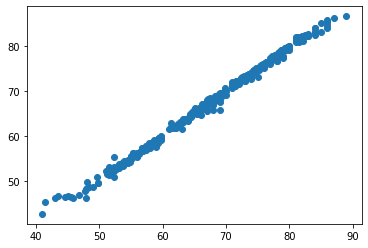

In [84]:
plt.scatter(y_test,y_pred)

In [85]:
df

Country  Year  Life_expectancy  Adult_Mortality  infant_deaths  \
0     Afghanistan  2015             65.0           263.00           60.5   
1     Afghanistan  2014             59.9           271.00           60.5   
2     Afghanistan  2013             59.9           268.00           60.5   
3     Afghanistan  2012             59.5           272.00           60.5   
4     Afghanistan  2011             59.2           275.00           60.5   
...           ...   ...              ...              ...            ...   
2933     Zimbabwe  2004             44.3           494.75           27.0   
2934     Zimbabwe  2003             44.5           494.75           26.0   
2935     Zimbabwe  2002             44.8            73.00           25.0   
2936     Zimbabwe  2001             45.3           494.75           25.0   
2937     Zimbabwe  2000             46.0           494.75           24.0   

      Alcohol  percentage_expenditure  Hepatitis_B   Measles   BMI  ...  \
0        0.01               71.279624    65.000000  990.6875  19.1  ...   
1        0.01               73.523582    62.000000  492.0000  18.6  ...   
2        0.01               73.219243    64.000000  430.0000  18.1  ...   
3        0.01               78.184215    67.000000  990.6875  17.6  ...   
4        0.01                7.097109    68.000000  990.6875  17.2  ...   
...       ...                     ...          ...       ...   ...  ...   
2933     4.36                0.000000    68.000000   31.0000  27.1  ...   
2934     4.06                0.000000    54.586268  990.6875  26.7  ...   
2935     4.43                0.000000    73.000000  304.0000  26.3  ...   
2936     1.72                0.000000    76.000000  529.0000  25.9  ...   
2937     1.68                0.000000    79.000000  990.6875  25.5  ...   

      Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0                  8.16        65.0     0.100  584.259210  33736494.0   
1                  8.18        62.0     0.100  612.696514    327582.0   
2                  8.13        64.0     0.100  631.744976  31731688.0   
3                  8.52        67.0     0.100  669.959000   3696958.0   
4                  7.87        68.0     0.100   63.537231   2978599.0   
...                 ...         ...       ...         ...         ...   
2933               7.13        65.0     2.025  454.366654  12777511.0   
2934               6.52        68.0     2.025  453.351155  12633897.0   
2935               6.53        71.0     2.025   57.348340    125525.0   
2936               6.16        75.0     2.025  548.587312  12366165.0   
2937               7.10        78.0     2.025  547.358878  12222251.0   

      thinnes_1_19_years  thinness_5_9_years  Income_composition_of_resources  \
0                 16.725                17.0                            0.479   
1                 16.725                17.0                            0.476   
2                 16.725                17.0                            0.470   
3                 16.725                17.0                            0.463   
4                 16.725                17.0                            0.454   
...                  ...                 ...                              ...   
2933               9.400                 9.4                            0.407   
2934               9.800                 9.9                            0.418   
2935               1.200                 1.3                            0.427   
2936               1.600                 1.7                            0.427   
2937              11.000                11.2                            0.434   

      Schooling  class  
0          10.1      1  
1          10.0      1  
2           9.9      1  
3           9.8      1  
4           9.5      1  
...         ...    ...  
2933        9.2      1  
2934        9.5      1  
2935       10.0      1  
2936        9.8      1  
2937        9.8      1  

[2938 rows x 22 columns]

In [86]:
# Lasso Regression

In [87]:
X = df.drop('Life_expectancy', axis=1)

y = df["Life_expectancy"].copy()   



In [88]:
X = X.drop('Country', axis=1)

In [89]:
from sklearn.model_selection import train_test_split
x_new_train,x_new_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)

In [90]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_new_train)
x_test=mmscaler.fit_transform(x_new_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [91]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)

In [92]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1)

In [93]:
pred = lasso_reg.predict(x_train)
x_train

0         1         2         3         4         5         6  \
0     0.866667  0.223158  1.000000  0.066116  0.000000  0.127149  0.864907   
1     0.666667  0.873684  0.123544  0.000000  0.465253  0.230567  0.459627   
2     0.400000  0.652632  0.315949  0.049587  0.500589  0.551934  1.000000   
3     0.933333  0.355789  0.771646  0.033058  0.000000  0.476269  0.977484   
4     1.000000  0.454737  0.048608  0.132231  0.270487  0.000000  0.414595   
...        ...       ...       ...       ...       ...       ...       ...   
1464  0.333333  0.360000  0.642025  0.033058  0.071849  0.010533  0.593379   
1465  0.933333  0.345263  0.062785  0.049587  0.000000  0.011115  0.000000   
1466  0.866667  0.446316  0.054684  0.132231  0.000000  0.007363  0.000000   
1467  0.600000  0.528421  0.332152  0.033058  0.004711  0.030016  0.392080   
1468  0.866667  0.621053  0.398987  0.066116  0.496466  0.043470  0.000000   

             7         8         9  
0     0.520850  0.352260  0.077922  
1     0.000000  0.771727  0.000000  
2     1.000000  0.618772  0.051948  
3     0.000000  0.356895  0.038961  
4     0.001009  0.032445  0.155844  
...        ...       ...       ...  
1464  0.300801  0.025492  0.025974  
1465  0.013122  0.266512  0.051948  
1466  0.062583  0.329085  0.155844  
1467  0.010094  0.163384  0.038961  
1468  0.000000  0.059096  0.064935  

[1469 rows x 10 columns]

In [94]:
y_test

867     77.3
1780    66.6
621     52.6
2715    61.5
2717    60.0
        ... 
2474    71.4
2933    44.3
190     74.7
598     61.3
978     74.4
Name: Life_expectancy, Length: 1469, dtype: float64

In [95]:
pred

array([53.03084248, 82.25932835, 72.32597   , ..., 63.05190158,
       66.74660186, 70.9066241 ])

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)


-0.868660424950755

In [97]:
X


Year  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
0     2015           263.00           60.5     0.01               71.279624   
1     2014           271.00           60.5     0.01               73.523582   
2     2013           268.00           60.5     0.01               73.219243   
3     2012           272.00           60.5     0.01               78.184215   
4     2011           275.00           60.5     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004           494.75           27.0     4.36                0.000000   
2934  2003           494.75           26.0     4.06                0.000000   
2935  2002            73.00           25.0     4.43                0.000000   
2936  2001           494.75           25.0     1.72                0.000000   
2937  2000           494.75           24.0     1.68                0.000000   

      Hepatitis_B   Measles   BMI  under_five_deaths  Polio  \
0       65.000000  990.6875  19.1                 77  44.75   
1       62.000000  492.0000  18.6                 77  58.00   
2       64.000000  430.0000  18.1                 77  62.00   
3       67.000000  990.6875  17.6                 77  67.00   
4       68.000000  990.6875  17.2                 77  68.00   
...           ...       ...   ...                ...    ...   
2933    68.000000   31.0000  27.1                 42  67.00   
2934    54.586268  990.6875  26.7                 41  44.75   
2935    73.000000  304.0000  26.3                 40  73.00   
2936    76.000000  529.0000  25.9                 39  76.00   
2937    79.000000  990.6875  25.5                 39  78.00   

      Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0                  8.16        65.0     0.100  584.259210  33736494.0   
1                  8.18        62.0     0.100  612.696514    327582.0   
2                  8.13        64.0     0.100  631.744976  31731688.0   
3                  8.52        67.0     0.100  669.959000   3696958.0   
4                  7.87        68.0     0.100   63.537231   2978599.0   
...                 ...         ...       ...         ...         ...   
2933               7.13        65.0     2.025  454.366654  12777511.0   
2934               6.52        68.0     2.025  453.351155  12633897.0   
2935               6.53        71.0     2.025   57.348340    125525.0   
2936               6.16        75.0     2.025  548.587312  12366165.0   
2937               7.10        78.0     2.025  547.358878  12222251.0   

      thinnes_1_19_years  thinness_5_9_years  Income_composition_of_resources  \
0                 16.725                17.0                            0.479   
1                 16.725                17.0                            0.476   
2                 16.725                17.0                            0.470   
3                 16.725                17.0                            0.463   
4                 16.725                17.0                            0.454   
...                  ...                 ...                              ...   
2933               9.400                 9.4                            0.407   
2934               9.800                 9.9                            0.418   
2935               1.200                 1.3                            0.427   
2936               1.600                 1.7                            0.427   
2937              11.000                11.2                            0.434   

      Schooling  class  
0          10.1      1  
1          10.0      1  
2           9.9      1  
3           9.8      1  
4           9.5      1  
...         ...    ...  
2933        9.2      1  
2934        9.5      1  
2935       10.0      1  
2936        9.8      1  
2937        9.8      1  

[2938 rows x 20 columns]

In [98]:
X = df.drop('Life_expectancy', axis=1)

y = df["Life_expectancy"].copy()   


In [99]:
X = X.drop('Country', axis=1)
X

Year  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
0     2015           263.00           60.5     0.01               71.279624   
1     2014           271.00           60.5     0.01               73.523582   
2     2013           268.00           60.5     0.01               73.219243   
3     2012           272.00           60.5     0.01               78.184215   
4     2011           275.00           60.5     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004           494.75           27.0     4.36                0.000000   
2934  2003           494.75           26.0     4.06                0.000000   
2935  2002            73.00           25.0     4.43                0.000000   
2936  2001           494.75           25.0     1.72                0.000000   
2937  2000           494.75           24.0     1.68                0.000000   

      Hepatitis_B   Measles   BMI  under_five_deaths  Polio  \
0       65.000000  990.6875  19.1                 77  44.75   
1       62.000000  492.0000  18.6                 77  58.00   
2       64.000000  430.0000  18.1                 77  62.00   
3       67.000000  990.6875  17.6                 77  67.00   
4       68.000000  990.6875  17.2                 77  68.00   
...           ...       ...   ...                ...    ...   
2933    68.000000   31.0000  27.1                 42  67.00   
2934    54.586268  990.6875  26.7                 41  44.75   
2935    73.000000  304.0000  26.3                 40  73.00   
2936    76.000000  529.0000  25.9                 39  76.00   
2937    79.000000  990.6875  25.5                 39  78.00   

      Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0                  8.16        65.0     0.100  584.259210  33736494.0   
1                  8.18        62.0     0.100  612.696514    327582.0   
2                  8.13        64.0     0.100  631.744976  31731688.0   
3                  8.52        67.0     0.100  669.959000   3696958.0   
4                  7.87        68.0     0.100   63.537231   2978599.0   
...                 ...         ...       ...         ...         ...   
2933               7.13        65.0     2.025  454.366654  12777511.0   
2934               6.52        68.0     2.025  453.351155  12633897.0   
2935               6.53        71.0     2.025   57.348340    125525.0   
2936               6.16        75.0     2.025  548.587312  12366165.0   
2937               7.10        78.0     2.025  547.358878  12222251.0   

      thinnes_1_19_years  thinness_5_9_years  Income_composition_of_resources  \
0                 16.725                17.0                            0.479   
1                 16.725                17.0                            0.476   
2                 16.725                17.0                            0.470   
3                 16.725                17.0                            0.463   
4                 16.725                17.0                            0.454   
...                  ...                 ...                              ...   
2933               9.400                 9.4                            0.407   
2934               9.800                 9.9                            0.418   
2935               1.200                 1.3                            0.427   
2936               1.600                 1.7                            0.427   
2937              11.000                11.2                            0.434   

      Schooling  class  
0          10.1      1  
1          10.0      1  
2           9.9      1  
3           9.8      1  
4           9.5      1  
...         ...    ...  
2933        9.2      1  
2934        9.5      1  
2935       10.0      1  
2936        9.8      1  
2937        9.8      1  

[2938 rows x 20 columns]

In [100]:
import statsmodels.api as sm
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life_expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          5.423e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):                        0.00
Time:                        20:57:50   Log-Likelihood:                         -7948.0
No. Observations:                2938   AIC:                                  1.594e+04
Df Residuals:                    2918   BIC:                                  1.606e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [101]:
# THUS FROM OLS METHOD WE GET VALUES OF P AND FOR SIGNIFICANT CORELATION THE VALUE OF P SHOULD BE LESS THAN 0.05:
[ 'Year', 'Adult_Mortality','infant_deaths','percentage_expenditure', 'Hepatitis_B', 'under_five_deaths', 'Polio', 
       'Diphtheria', 'HIV/AIDS', 'Population','thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'class']

['Year',
 'Adult_Mortality',
 'infant_deaths',
 'percentage_expenditure',
 'Hepatitis_B',
 'under_five_deaths',
 'Polio',
 'Diphtheria',
 'HIV/AIDS',
 'Population',
 'thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling',
 'class']

In [102]:
df.columns

Index(['Country', 'Year', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'class'],
      dtype='object')

In [103]:
from sklearn.feature_selection import RFE

In [104]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X = train_prepared
y = train_labels
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.get_support([5])
X

array([[ 1.6217623 , -0.44444792,  0.84853616, ..., -0.75056837,
        -0.61305647,  0.45939851],
       [ 1.40498625, -0.98094995,  0.91637985, ..., -0.76556673,
        -0.64482646,  0.45939851],
       [ 1.1882102 , -0.98094995,  0.89093847, ..., -0.79556343,
        -0.67659645,  0.45939851],
       ...,
       [-1.19632639, -2.56941673, -0.76275139, ..., -1.01053983,
        -0.64482646,  0.45939851],
       [-1.41310244, -2.5168185 ,  2.81388295, ..., -1.01053983,
        -0.70836644,  0.45939851],
       [-1.62987849, -2.44318096,  2.81388295, ..., -0.97554367,
        -0.70836644,  0.45939851]])

In [105]:
selector.get_feature_names_out(['Country', 'Year', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'class'])

array(['Year', 'infant_deaths', 'under_five_deaths', 'Polio', 'HIV/AIDS'],
      dtype=object)

In [106]:
# THUS FROM THE FEATURE SELECTION IN SCIKIT LEARN GIVES THESE 5 MOST IMPORTANT PARAMETERS:
['Year', 'infant_deaths', 'under_five_deaths', 'Polio', 'HIV/AIDS']

['Year', 'infant_deaths', 'under_five_deaths', 'Polio', 'HIV/AIDS']

In [107]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_expectancy, Length: 2938, dtype: float64